In [1]:
# USAGE
# python facial_landmarks.py --shape-predictor shape_predictor_68_face_landmarks.dat --image images/example_01.jpg 

# import the necessary packages
from imutils import face_utils
import os
import numpy as np
import argparse
import imutils
import dlib
import cv2
from matplotlib.pyplot import imshow
%matplotlib inline

directory = "../cartoons_2_test/images/"
images = os.listdir(directory)
images.sort()

In [68]:
def get_keypoints(image_name):
    # initialize dlib's face detector (HOG-based) and then create
    # the facial landmark predictor
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

    # load the input image, resize it, and convert it to grayscale
    image = cv2.imread(image_name)
    image = imutils.resize(image, width=500)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detect faces in the grayscale image
    rects = detector(gray, 1)
    if len(rects) == 0:
        return None
    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (255, 0, 0), -1)
        imshow(image)
        path = os.path.join('dotted', image_name.split("/")[-1]+".jpg")
        print path
        imsave(path, image)
        return shape

dotted/concatenated_AishwaryaRai1-inputs.png.jpg
concatenated_AishwaryaRai1-inputs.png


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


dotted/concatenated_AishwaryaRai2-inputs.png.jpg
concatenated_AishwaryaRai2-inputs.png
dotted/concatenated_AishwaryaRai3-inputs.png.jpg
concatenated_AishwaryaRai3-inputs.png
dotted/concatenated_AishwaryaRai4-inputs.png.jpg
concatenated_AishwaryaRai4-inputs.png
dotted/concatenated_ArnoldSchwarzenegger0-inputs.png.jpg
concatenated_ArnoldSchwarzenegger0-inputs.png
dotted/concatenated_ArnoldSchwarzenegger0-targets.png.jpg
concatenated_ArnoldSchwarzenegger0-targets.png
dotted/concatenated_ArnoldSchwarzenegger1-inputs.png.jpg
concatenated_ArnoldSchwarzenegger1-inputs.png
dotted/concatenated_ArnoldSchwarzenegger1-targets.png.jpg
concatenated_ArnoldSchwarzenegger1-targets.png
dotted/concatenated_ArnoldSchwarzenegger2-inputs.png.jpg
concatenated_ArnoldSchwarzenegger2-inputs.png
dotted/concatenated_ArnoldSchwarzenegger2-targets.png.jpg
concatenated_ArnoldSchwarzenegger2-targets.png
dotted/concatenated_ArnoldSchwarzenegger3-inputs.png.jpg
concatenated_ArnoldSchwarzenegger3-inputs.png
dotted/conca

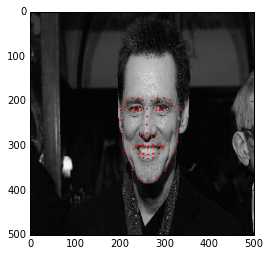

In [69]:
from collections import defaultdict

# Get the keypoints of all of the images
input_keypoints = defaultdict(list)
target_keypoints = defaultdict(list)


for image in images:
    image_person = image.split("-")[0]
    image_person = image_person.split("_")[1][:-1]
    image_type = image.split("-")[1][:-4]
    if image_type == "outputs":
        continue
    keypoints = get_keypoints(directory + image)
    if keypoints != None:
        print image
        if image_type == "inputs":
            input_keypoints[image_person] += [(image, keypoints)]
        if image_type == "targets":
            target_keypoints[image_person] += [(image, keypoints)]

72
['ArnoldSchwarzenegger', 'DanielCraig', 'JimCarrey', 'EmmaWatson', 'AishwaryaRai']
concatenated_ArnoldSchwarzenegger0-inputs.png concatenated_ArnoldSchwarzenegger0-targets.png
(500, 500, 3) (500, 500, 3) (500, 500, 3)
concatenated_ArnoldSchwarzenegger0-inputs.png concatenated_ArnoldSchwarzenegger1-targets.png
(500, 500, 3) (500, 500, 3) (500, 500, 3)
concatenated_ArnoldSchwarzenegger0-inputs.png concatenated_ArnoldSchwarzenegger2-targets.png
(500, 500, 3) (500, 500, 3) (500, 500, 3)
concatenated_ArnoldSchwarzenegger0-inputs.png concatenated_ArnoldSchwarzenegger3-targets.png
(500, 500, 3) (500, 500, 3) (500, 500, 3)
concatenated_ArnoldSchwarzenegger1-inputs.png concatenated_ArnoldSchwarzenegger0-targets.png
(500, 500, 3) (500, 500, 3) (500, 500, 3)
concatenated_ArnoldSchwarzenegger1-inputs.png concatenated_ArnoldSchwarzenegger1-targets.png
(500, 500, 3) (500, 500, 3) (500, 500, 3)
concatenated_ArnoldSchwarzenegger1-inputs.png concatenated_ArnoldSchwarzenegger2-targets.png
(500, 500, 

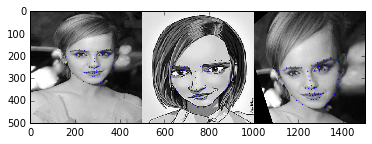

In [74]:
print len(images)
print input_keypoints.keys()
import cv2
from scipy.misc import imsave


# See which ones have both
for person in input_keypoints:
    if person in target_keypoints:
        count = 0
        for i in range(len(input_keypoints[person])):
            for j in range(len(target_keypoints[person])):
                photo_example = input_keypoints[person][i]
                caricature_example = target_keypoints[person][j]
                print photo_example[0], caricature_example[0]
                original_photo_keypoints = photo_example[1]
                original_caricature_keypoints = caricature_example[1]
                photo = cv2.imread("dotted/"+photo_example[0] + ".jpg")
                caricature = cv2.imread("dotted/"+caricature_example[0] + ".jpg")
                h, status = cv2.findHomography(original_photo_keypoints, original_caricature_keypoints)
                im_dst = cv2.warpPerspective(photo, h, (500, 500))
                photo = cv2.resize(photo, (500, 500))
                caricature =  cv2.resize(caricature, (500, 500))
                print im_dst.shape, photo.shape, caricature.shape
                concatenated = np.hstack((photo, caricature, im_dst))
                imshow(concatenated)
                imsave(os.path.join('warps', person+str(count)+".jpg"), concatenated)
                count += 1

# def rectify_face(image, keypoints):
    